<a href="https://colab.research.google.com/github/jyothi-sk/ML_Classification/blob/main/Email_Campaign_Effectiveness_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Email Campaign Effectiveness Prediction



# **Project Summary -**

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

# **GitHub Link -**

# **Problem Statement**


The objective is to characterize the mail and track the mail that is ignored, read or acknowledged by the reader.

# **Let's Begin !**

**Importing Libraries**

In [1]:
# importing numpy and pandas
import numpy as np
import pandas as pd

# Importing Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#importing preprocessing libraries
from scipy import stats
from scipy.special import boxcox1p
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures, PowerTransformer, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Import model selection and Gridsearch cv & Randomsearch cv for hyperparameter tuning
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

# import evalution metrics
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from IPython.display import SVG,display


#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# install Shap
!pip install shap

# import for model explainibility
import shap
import graphviz
sns.set_style('darkgrid')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 10.5 MB/s eta 0:00:00


**Dataset Loading**

In [3]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Module4_ML/Classification_capstone_project/data_email_campaign.csv')

**Dataset First View**

In [5]:
# Dataset First Look
df.head()


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [6]:
df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [7]:
# Dataset Rows & Columns count
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 68353
Number of columns: 12


In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


From above information we can observe that there are numerical and categorical features in this dataset. Few features contain null values. And the features  '**Email_Type**',	'**Email_Source_Type**',	'**Email_Campaign_Type**', '**Time_Email_sent_Category**' and '**Email_Status**' should be categorical but are in numeric form.

In [9]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    68353
dtype: int64

In [10]:
# Missing Values/Null Values Count
df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

<Figure size 1000x600 with 0 Axes>

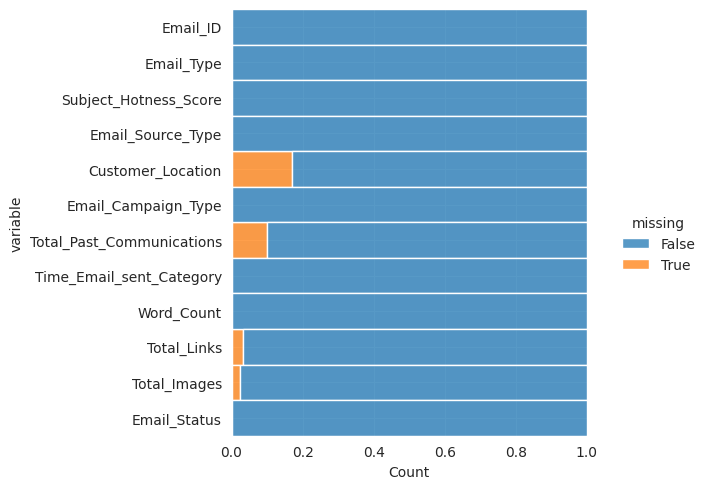

In [11]:
# Visualizing the missing values

plt.figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25);

**Description**: Our email campaign dataset have 68353 observations and 12 features. Clearly Email_Status is our target variable.

Features:

**Email Id**- It contains the email id's of the customers/individuals

**Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.

**Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.

**Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.

**Email Campaign Type** - The campaign type of the email.

**Total Past Communications** - This column contains the total previous mails from the same source, the number of communications had.

**Customer Location** - Contains demographical data of the customer, the location where the customer resides.

**Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

**Word Count** - The number of words contained in the email.

**Total links** - Number of links in the email.

**Total Images** - Number of images in the email.

**Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

**Understanding Variables**

In [12]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.0,1.285094,0.451462,1.0,1.0,1.0,2.0,2.0
Subject_Hotness_Score,68353.0,1.095481,0.997578,0.0,0.2,0.8,1.8,5.0
Email_Source_Type,68353.0,1.456513,0.498109,1.0,1.0,1.0,2.0,2.0
Email_Campaign_Type,68353.0,2.272234,0.468680,1.0,2.0,2.0,3.0,3.0
Total_Past_Communications,61528.0,28.933250,12.536518,0.0,20.0,28.0,38.0,67.0
Time_Email_sent_Category,68353.0,1.999298,0.631103,1.0,2.0,2.0,2.0,3.0
Word_Count,68353.0,699.931751,271.719440,40.0,521.0,694.0,880.0,1316.0
Total_Links,66152.0,10.429526,6.383270,1.0,6.0,9.0,14.0,49.0
Total_Images,66676.0,3.550678,5.596983,0.0,0.0,0.0,5.0,45.0
Email_Status,68353.0,0.230934,0.497032,0.0,0.0,0.0,0.0,2.0


**Variables Description**

*   We can see that the Email_Type and Email_Source_Type have 1 values for 50% of the data indicating skewness of the feature.
*   Subject_Hotness_Score is also low till 75 percent compared to maximum value.
*   Upto 75 percent of data has 2 values for Time_Email_sent_Category indicating most of the emails sent mostly in the evening.
*    Most of the email, 75%, have 0 as Email_Status indicating most emails are unread.








In [14]:
df['Customer_Location'].value_counts()

G    23173
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: Customer_Location, dtype: int64

In [15]:
# Checking Unique Values for each variable.
unique_values_df = pd.DataFrame(index = list(df.columns))
list_values = []
for var in list(df.columns):
 list_values.append(list(df[var].unique().tolist()))
unique_values_df['Unique Values'] = list_values
unique_values_df['Unique Values Count'] = df.nunique()
unique_values_df


,Unique Values,Unique Values Count
Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353
Email_Type,"[1, 2]",2
Subject_Hotness_Score,"[2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ...",51
Email_Source_Type,"[2, 1]",2
Customer_Location,"[E, nan, B, C, G, D, F, A]",7
Email_Campaign_Type,"[2, 3, 1]",3
Total_Past_Communications,"[33.0, 15.0, 36.0, 25.0, 18.0, nan, 34.0, 21.0...",64
Time_Email_sent_Category,"[1, 2, 3]",3
Word_Count,"[440, 504, 962, 610, 947, 416, 116, 1241, 655,...",151
Total_Links,"[8.0, 5.0, 16.0, 4.0, 11.0, 6.0, 21.0, nan, 31...",37


**Observation:** from the above table, we understand that the columns 'Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Status' are categorical in nature. We can change to object type for these categories.

##**Data Wrangling**

In [16]:
# We can split the column 'Date' into day, month and year.

for i in ['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Status']:
  df[i] = df[i].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  object 
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  object 
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  object 
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  object 
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 6.3+ MB


In [17]:
def fillingna(column):
  for i in column.items():
    if i[1] == 'mean':
      df[i[0]] = df[i[0]].fillna(df[i[0]].mean())
    else:
      print("Specify one of the aggregate methods - Mean, Mode, Median")


In [18]:
fillingna({'Total_Past_Communications':'mean', 'Total_Links':'mean', 'Total_Images':'mean'})

In [19]:
df['Customer_Location'] = df['Customer_Location'].fillna(df['Customer_Location'].mode().iloc[0])

**Manipulations done**:

Converted all categorical columns to 'Object' type.
Filled NA values with mean and mode values.



## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### **Univariate Analysis**

<Axes: xlabel='Email_Status', ylabel='count'>

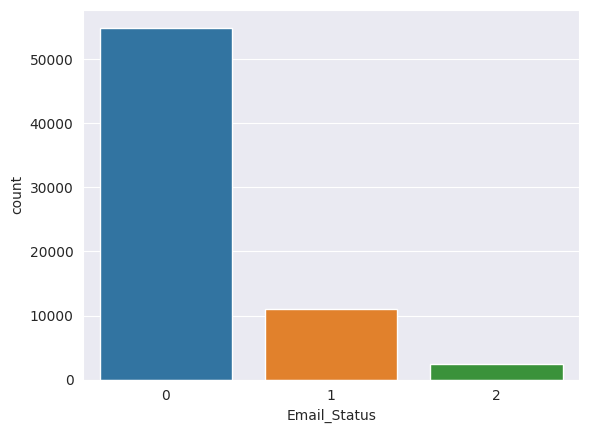

In [20]:
# Chart - 1 visualization code  - plot of dependent variable
sns.countplot(data=df, x='Email_Status')

**Plot used**: Bar plot gives the count of each category of a feature.  
**Insight**: As we know 0, 1 and 2 indicate email is ignored, read or acknowledged. From the above plot it is clear that most of the emails are being ignored.

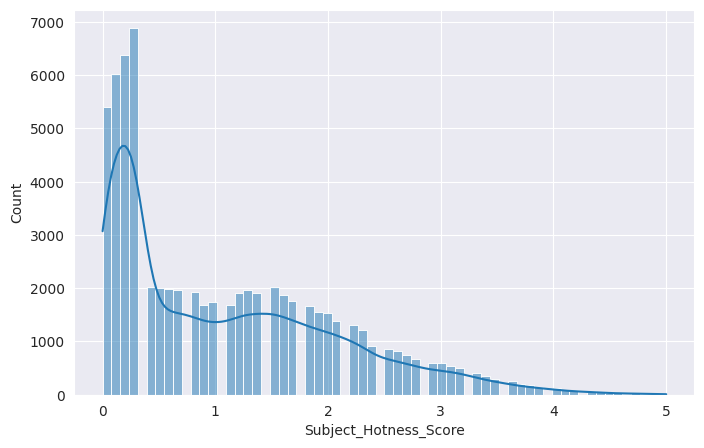

In [21]:
# Chart - 2 visualization code  - histplot for numerical features

fig= plt.subplots(figsize = (8,5))
sns.histplot(data = df, x = df['Subject_Hotness_Score'], kde = True)
plt.show()

**Plot used:** The histplots are used for understanding the distribution of data of a feature.

**Insights:** From the plots it is clear that the Subject_Hotness_Score feature is right skewed.

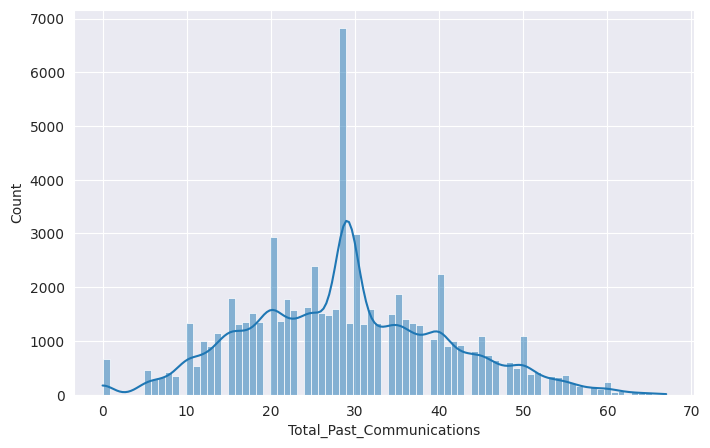

In [22]:
# Chart - 3 visualization code  - histplot of

fig= plt.subplots(figsize = (8,5))
sns.histplot(data = df, x = df['Total_Past_Communications'], kde = True)
plt.show()

**Insights**: From the plot we can understand that the features Total_Communications is normally skewed with few outliers with values around 30.

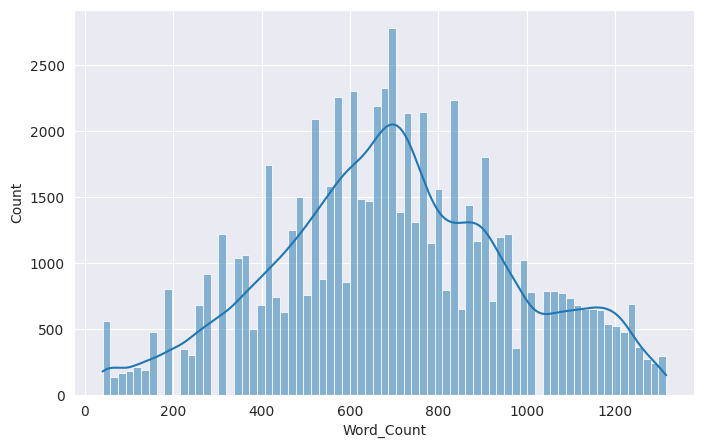

In [23]:
# Chart - 4 visualization code  - histplot for numerical features

fig = plt.subplots(figsize = (8, 5))
sns.histplot(data = df, x = df['Word_Count'], kde = True)
plt.show()

**Insights**: From the plots we can understand that the Word_Count feature is mostly normally skewed.

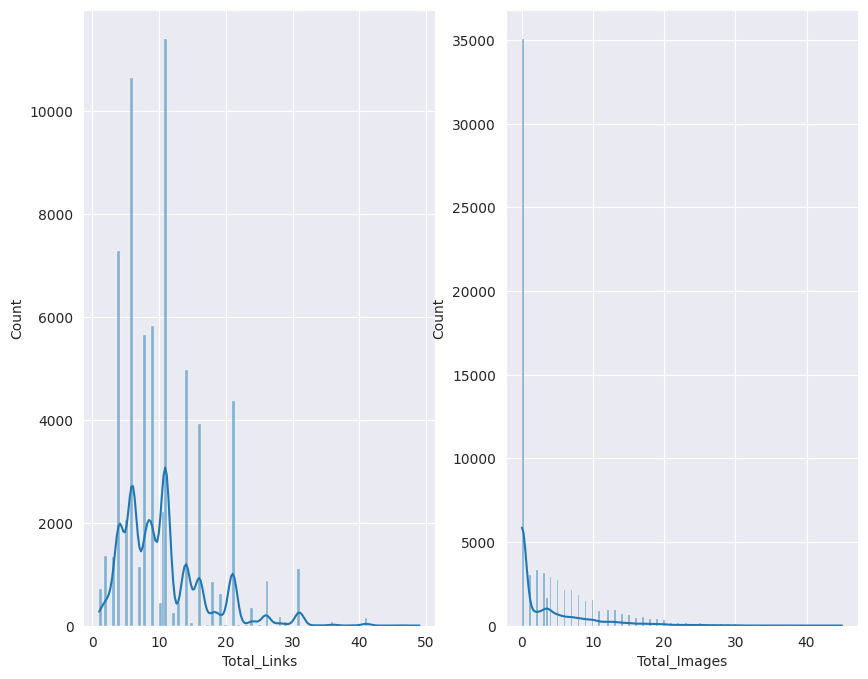

In [24]:
# Chart - 5 visualization code  - histplot for numerical features

fig, ax = plt.subplots(1, 2, figsize = (10,8))
sns.histplot(data = df, x = df['Total_Links'], ax=ax[0], kde = True)
sns.histplot(data = df, x = df['Total_Images'], ax=ax[1], kde = True)
plt.show()

**Insights**: From the plots we can understand that the features Total_links and Total_images are highly right skewed.

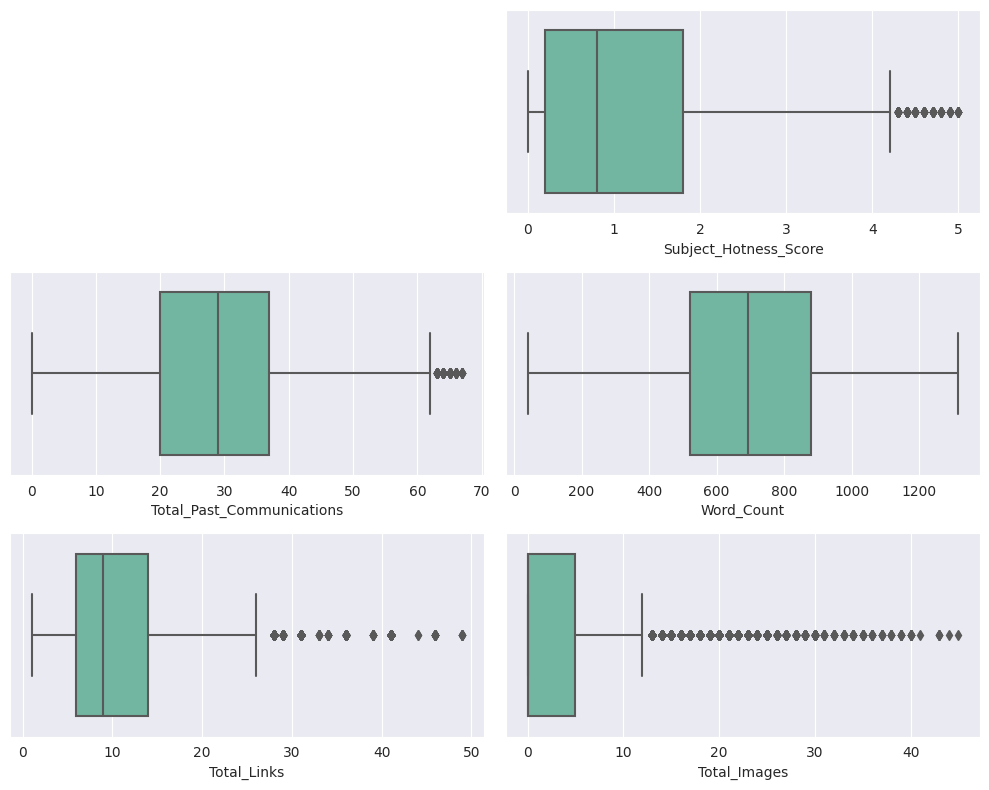

In [25]:
# Chart - 6 visualization code - boxplots for numerical features
fig, ax= plt.subplots(nrows=3, ncols=2, figsize = (10,8))
ax=ax.flatten()
cnt=0
for i in df.describe(include='number').columns:
  cnt+=1
  sns.boxplot(data = df, x = df[i], ax=ax[cnt], palette = 'Set2')
[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]
plt.tight_layout()
plt.show()


**Plot used**: The boxplot is ideal for understanding the presence of outliers in the features.

**Insights found**:

#### **Bivariate Analysis**

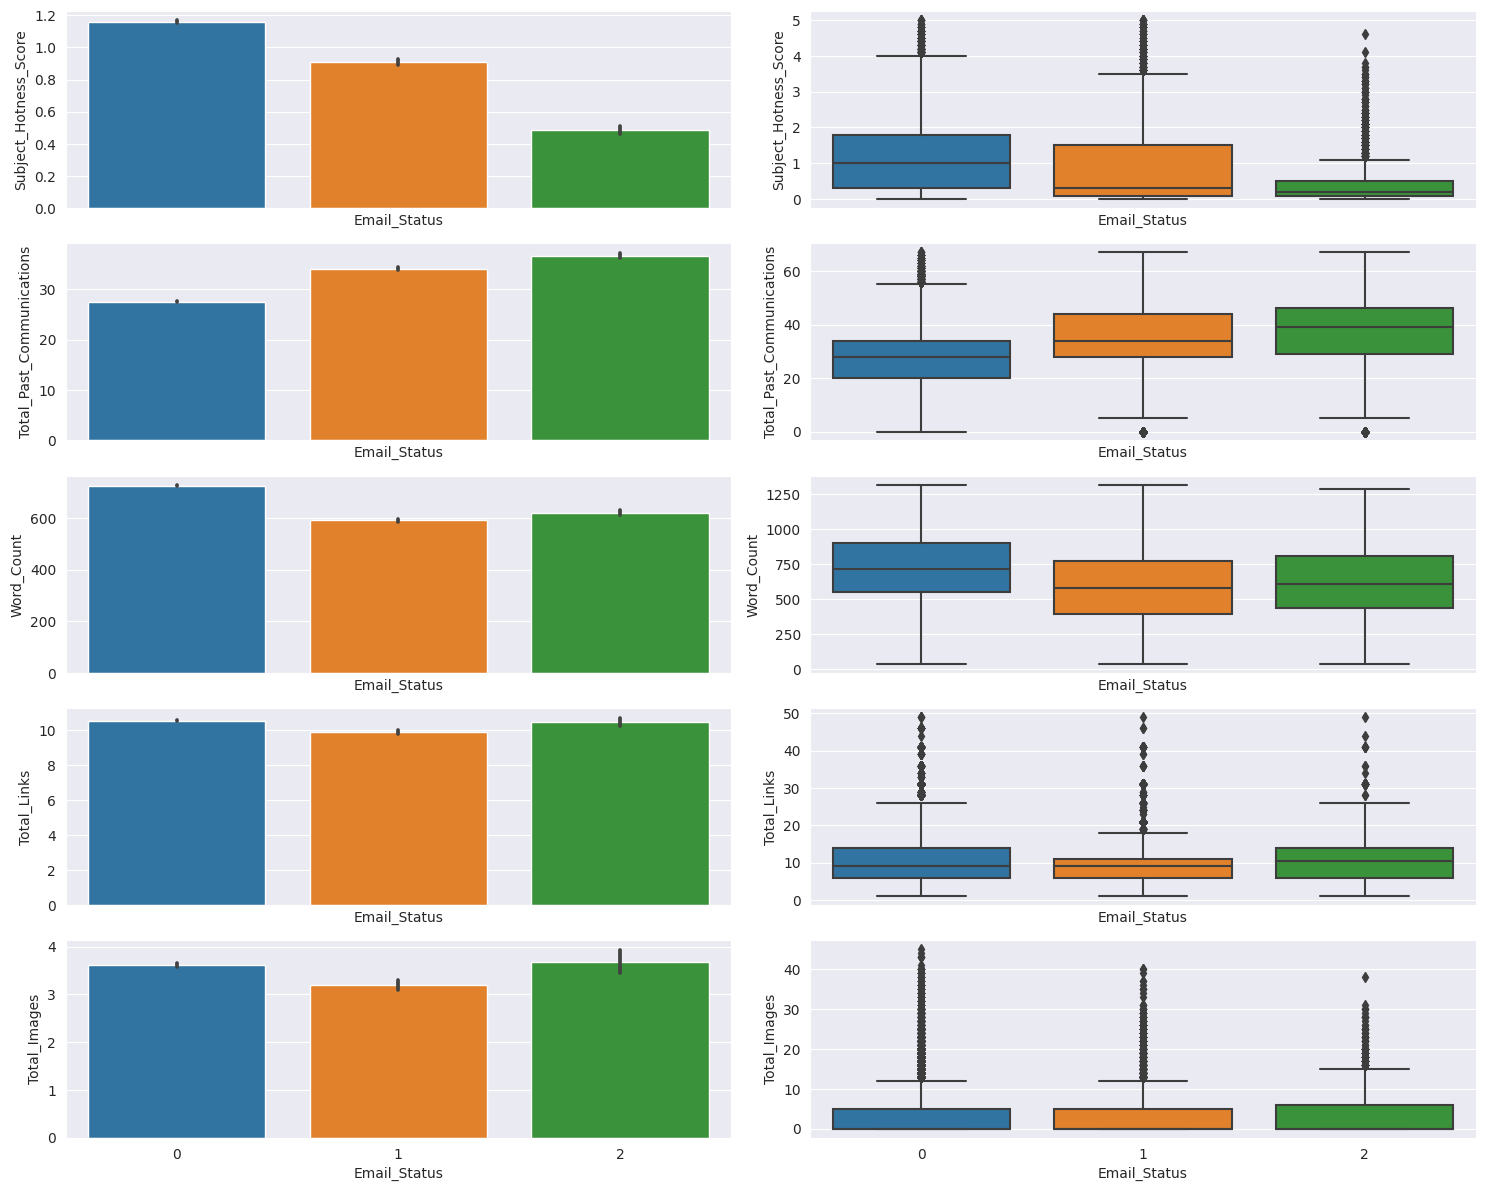

In [26]:
# Chart - 7 visualization code

fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, figsize = (15,12))
ax=ax.flatten()
k=0
for i in df.describe(include='number').columns:
  sns.barplot(data = df, x ="Email_Status", y=i, ax=ax[k])
  k+=1
  sns.boxplot(data=df, x='Email_Status', y=i, ax=ax[k])
  k+=1
#[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]
plt.tight_layout()
plt.show()

**Plot used:** The bar plot is good for bivariate comparison. see the count of total images, total links, word count, total past communications and subject hotness score against email_status.

**Insights found:** From above plots we understand that subject hotness score is least for email_status 2 cateory.

In [27]:
#Defining the function for bar percentage calculations
def perc(ax, k):
  unique = len([x for x in df[k].unique()])
  bars = ax.patches
  for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

In [28]:
def pieplots(i):
  fig, ax = plt.subplots(figsize = (8,5))
  color= ['skyblue', 'mediumseagreen', 'yellow','lightblue','grey', 'orange', 'red', 'aquamarine', 'green', 'lightblue', 'purple']
  data = df[i].value_counts()
  keys = list(df[i].unique())
  #plt.subplot(1,2,count)
  plt.pie(data, labels=keys, autopct="%1.1f%%", startangle=60, shadow=True, colors = color[0:len(keys)+1])
  plt.title(f"{i}")
  plt.show()

<Figure size 800x500 with 0 Axes>

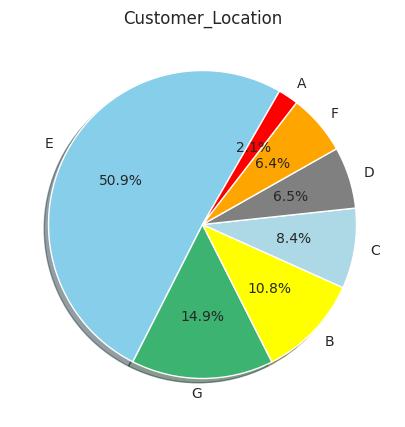

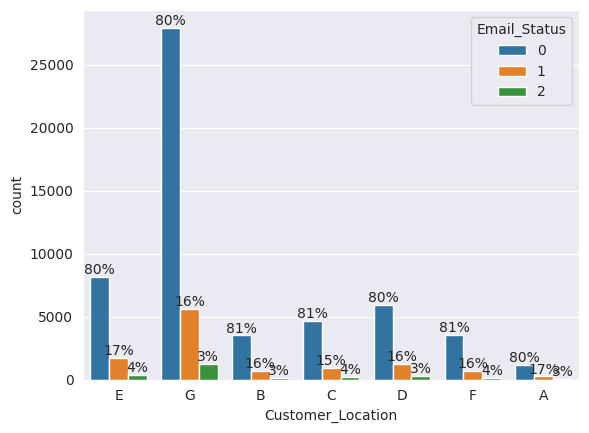

In [29]:
# Chart - 8 visualization code - countplot for numerical features against email_score feature
fig= plt.figure(figsize = (8,5))
pieplots('Customer_Location')
ax = sns.countplot(x=df['Customer_Location'], hue=df["Email_Status"])
perc(ax, 'Customer_Location')

plt.show()

**Plot used**:

**Insights found:**

<Figure size 800x500 with 0 Axes>

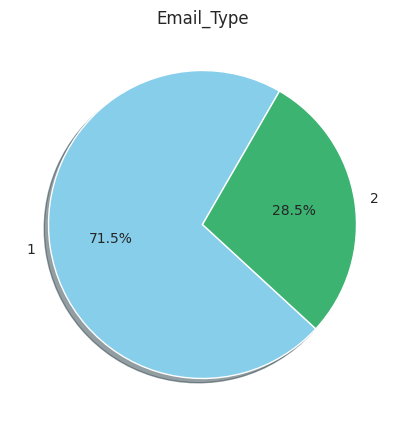

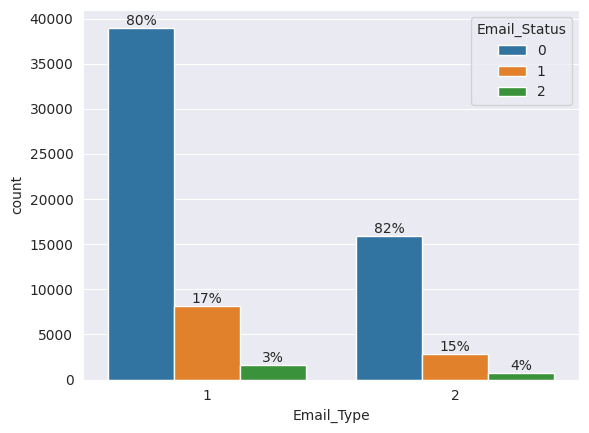

In [30]:
# Chart - 9 visualization code
fig = plt.figure(figsize = (8,5));
pieplots('Email_Type');
ax=sns.countplot(data=df, x='Email_Type', hue='Email_Status');
perc(ax, 'Email_Type');

**Plot used:**

**Insights found:**

<Figure size 800x500 with 0 Axes>

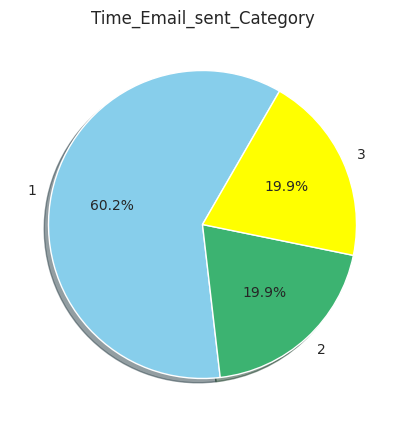

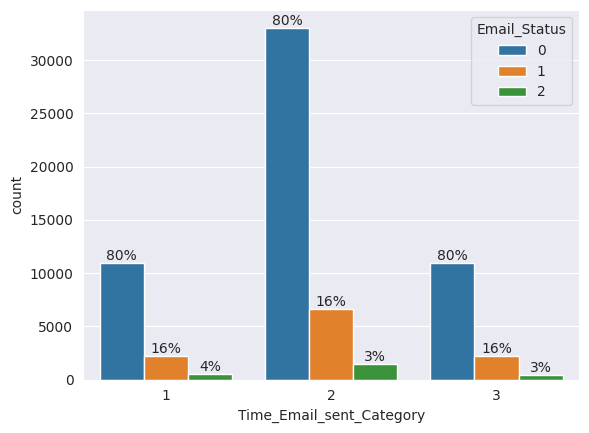

In [31]:
# Chart - 10 visualization code
fig = plt.figure(figsize = (8,5))
pieplots('Time_Email_sent_Category')
ax=sns.countplot(data=df, x='Time_Email_sent_Category', hue='Email_Status')
perc(ax, 'Time_Email_sent_Category')

**Plot used:**

**Insights found:**

<Figure size 800x500 with 0 Axes>

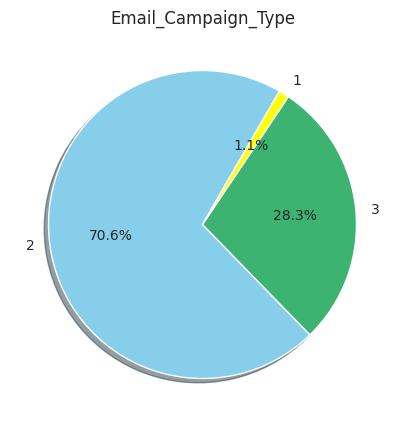

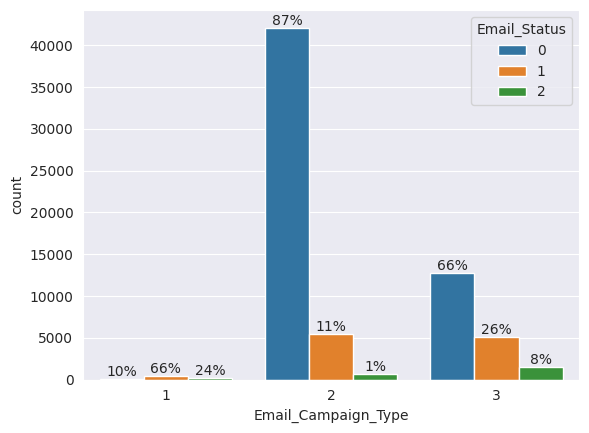

In [32]:
# Chart - 11 visualization code
fig = plt.figure(figsize = (8,5))
pieplots('Email_Campaign_Type')
ax=sns.countplot(data=df, x='Email_Campaign_Type', hue='Email_Status')
perc(ax, 'Email_Campaign_Type')

**Insights:**

<Figure size 800x500 with 0 Axes>

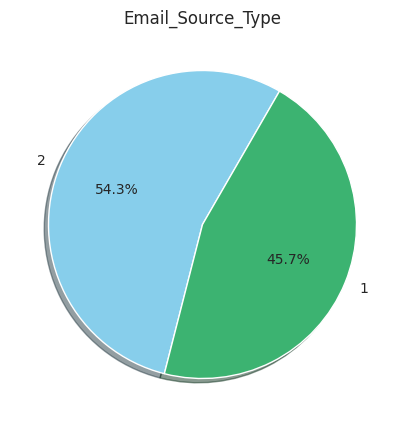

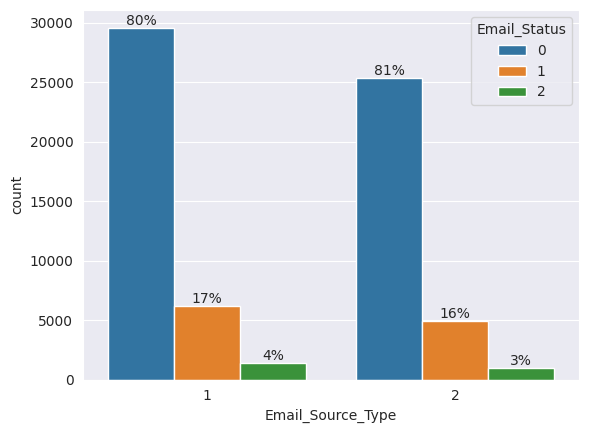

In [33]:
# Chart - 12 visualization code
fig = plt.figure(figsize = (8,5))
pieplots('Email_Source_Type')
ax= sns.countplot(data=df, x='Email_Source_Type', hue='Email_Status')
perc(ax, 'Email_Source_Type')
plt.show()

**Insights:**

<Figure size 1000x800 with 0 Axes>

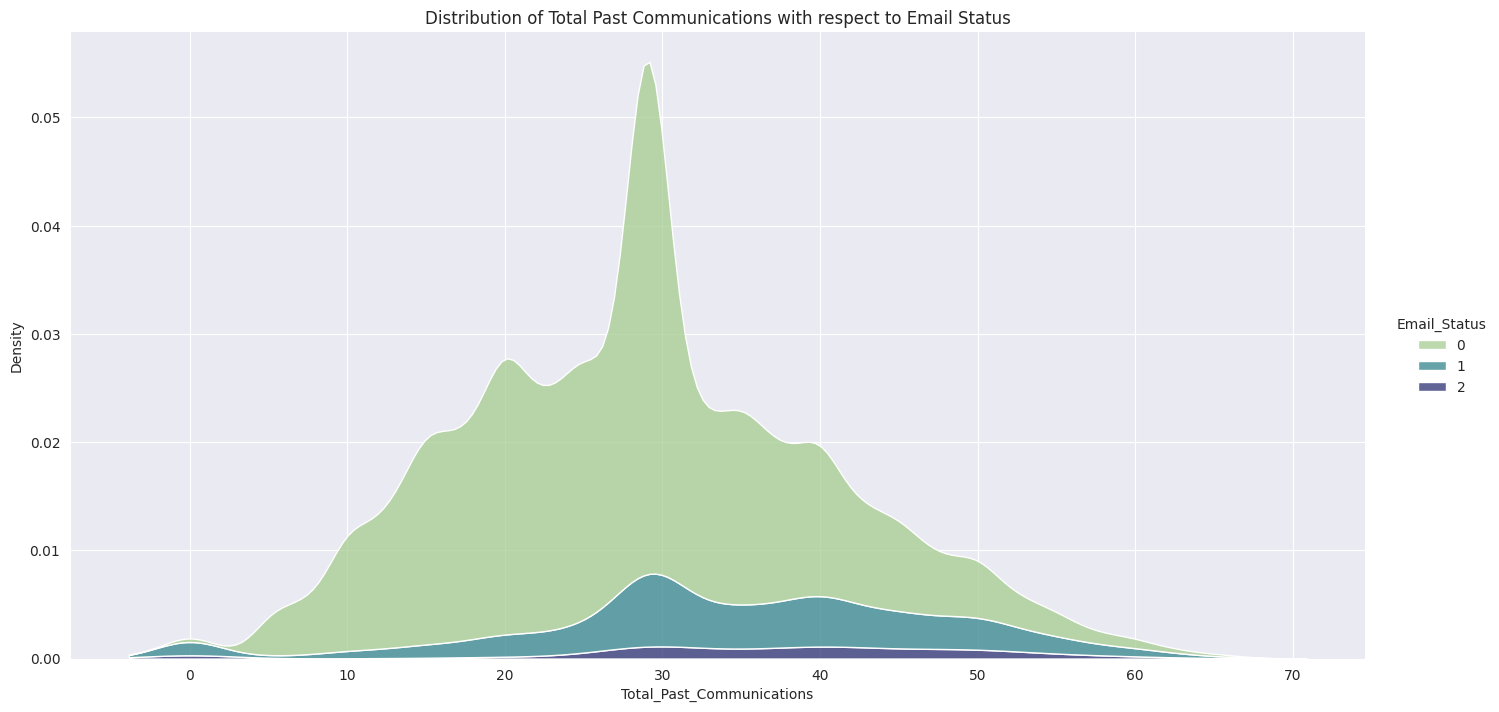

In [34]:
#Chart - 13 - distplot for Total_Past_Communications w..t. Email_Status
fig = plt.figure(figsize=(10,8))
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data = df,
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='crest');

plt.title('Distribution of Total Past Communications with respect to Email Status');
plt.xlabel('Total_Past_Communications');
plt.show()


<Axes: >

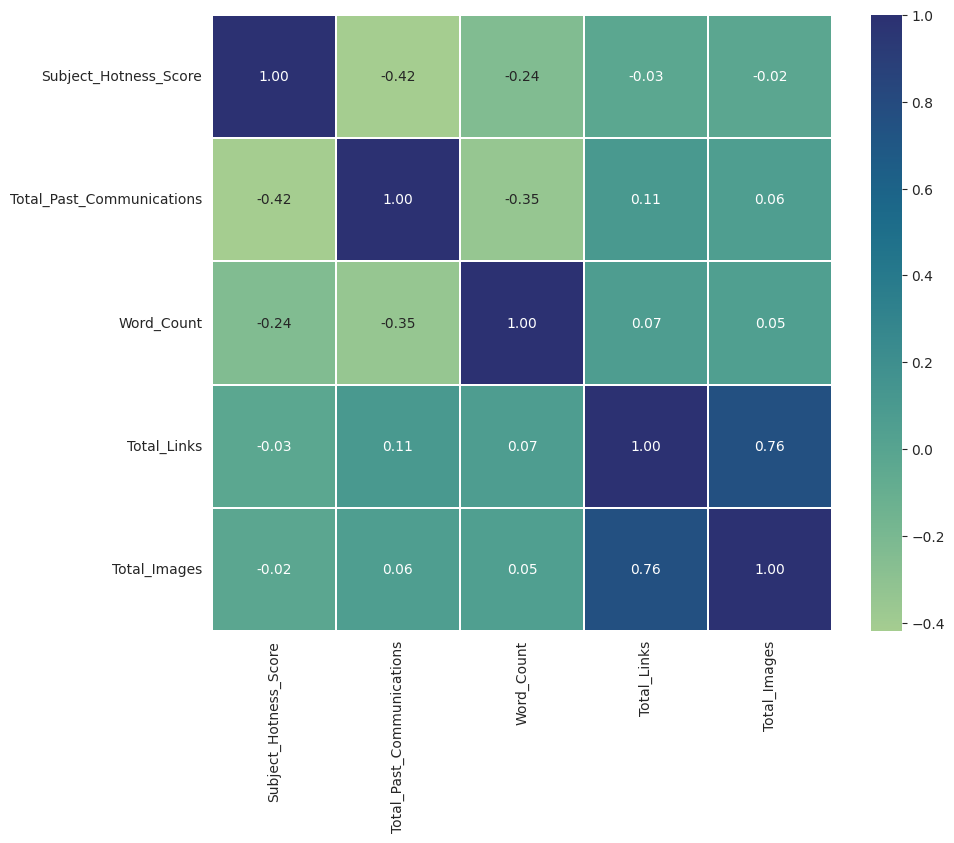

In [35]:
#Chart - 14 - Correlation Heatmap
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap='crest', linewidths=0.1)

**Plot used:**
**Insights found:**

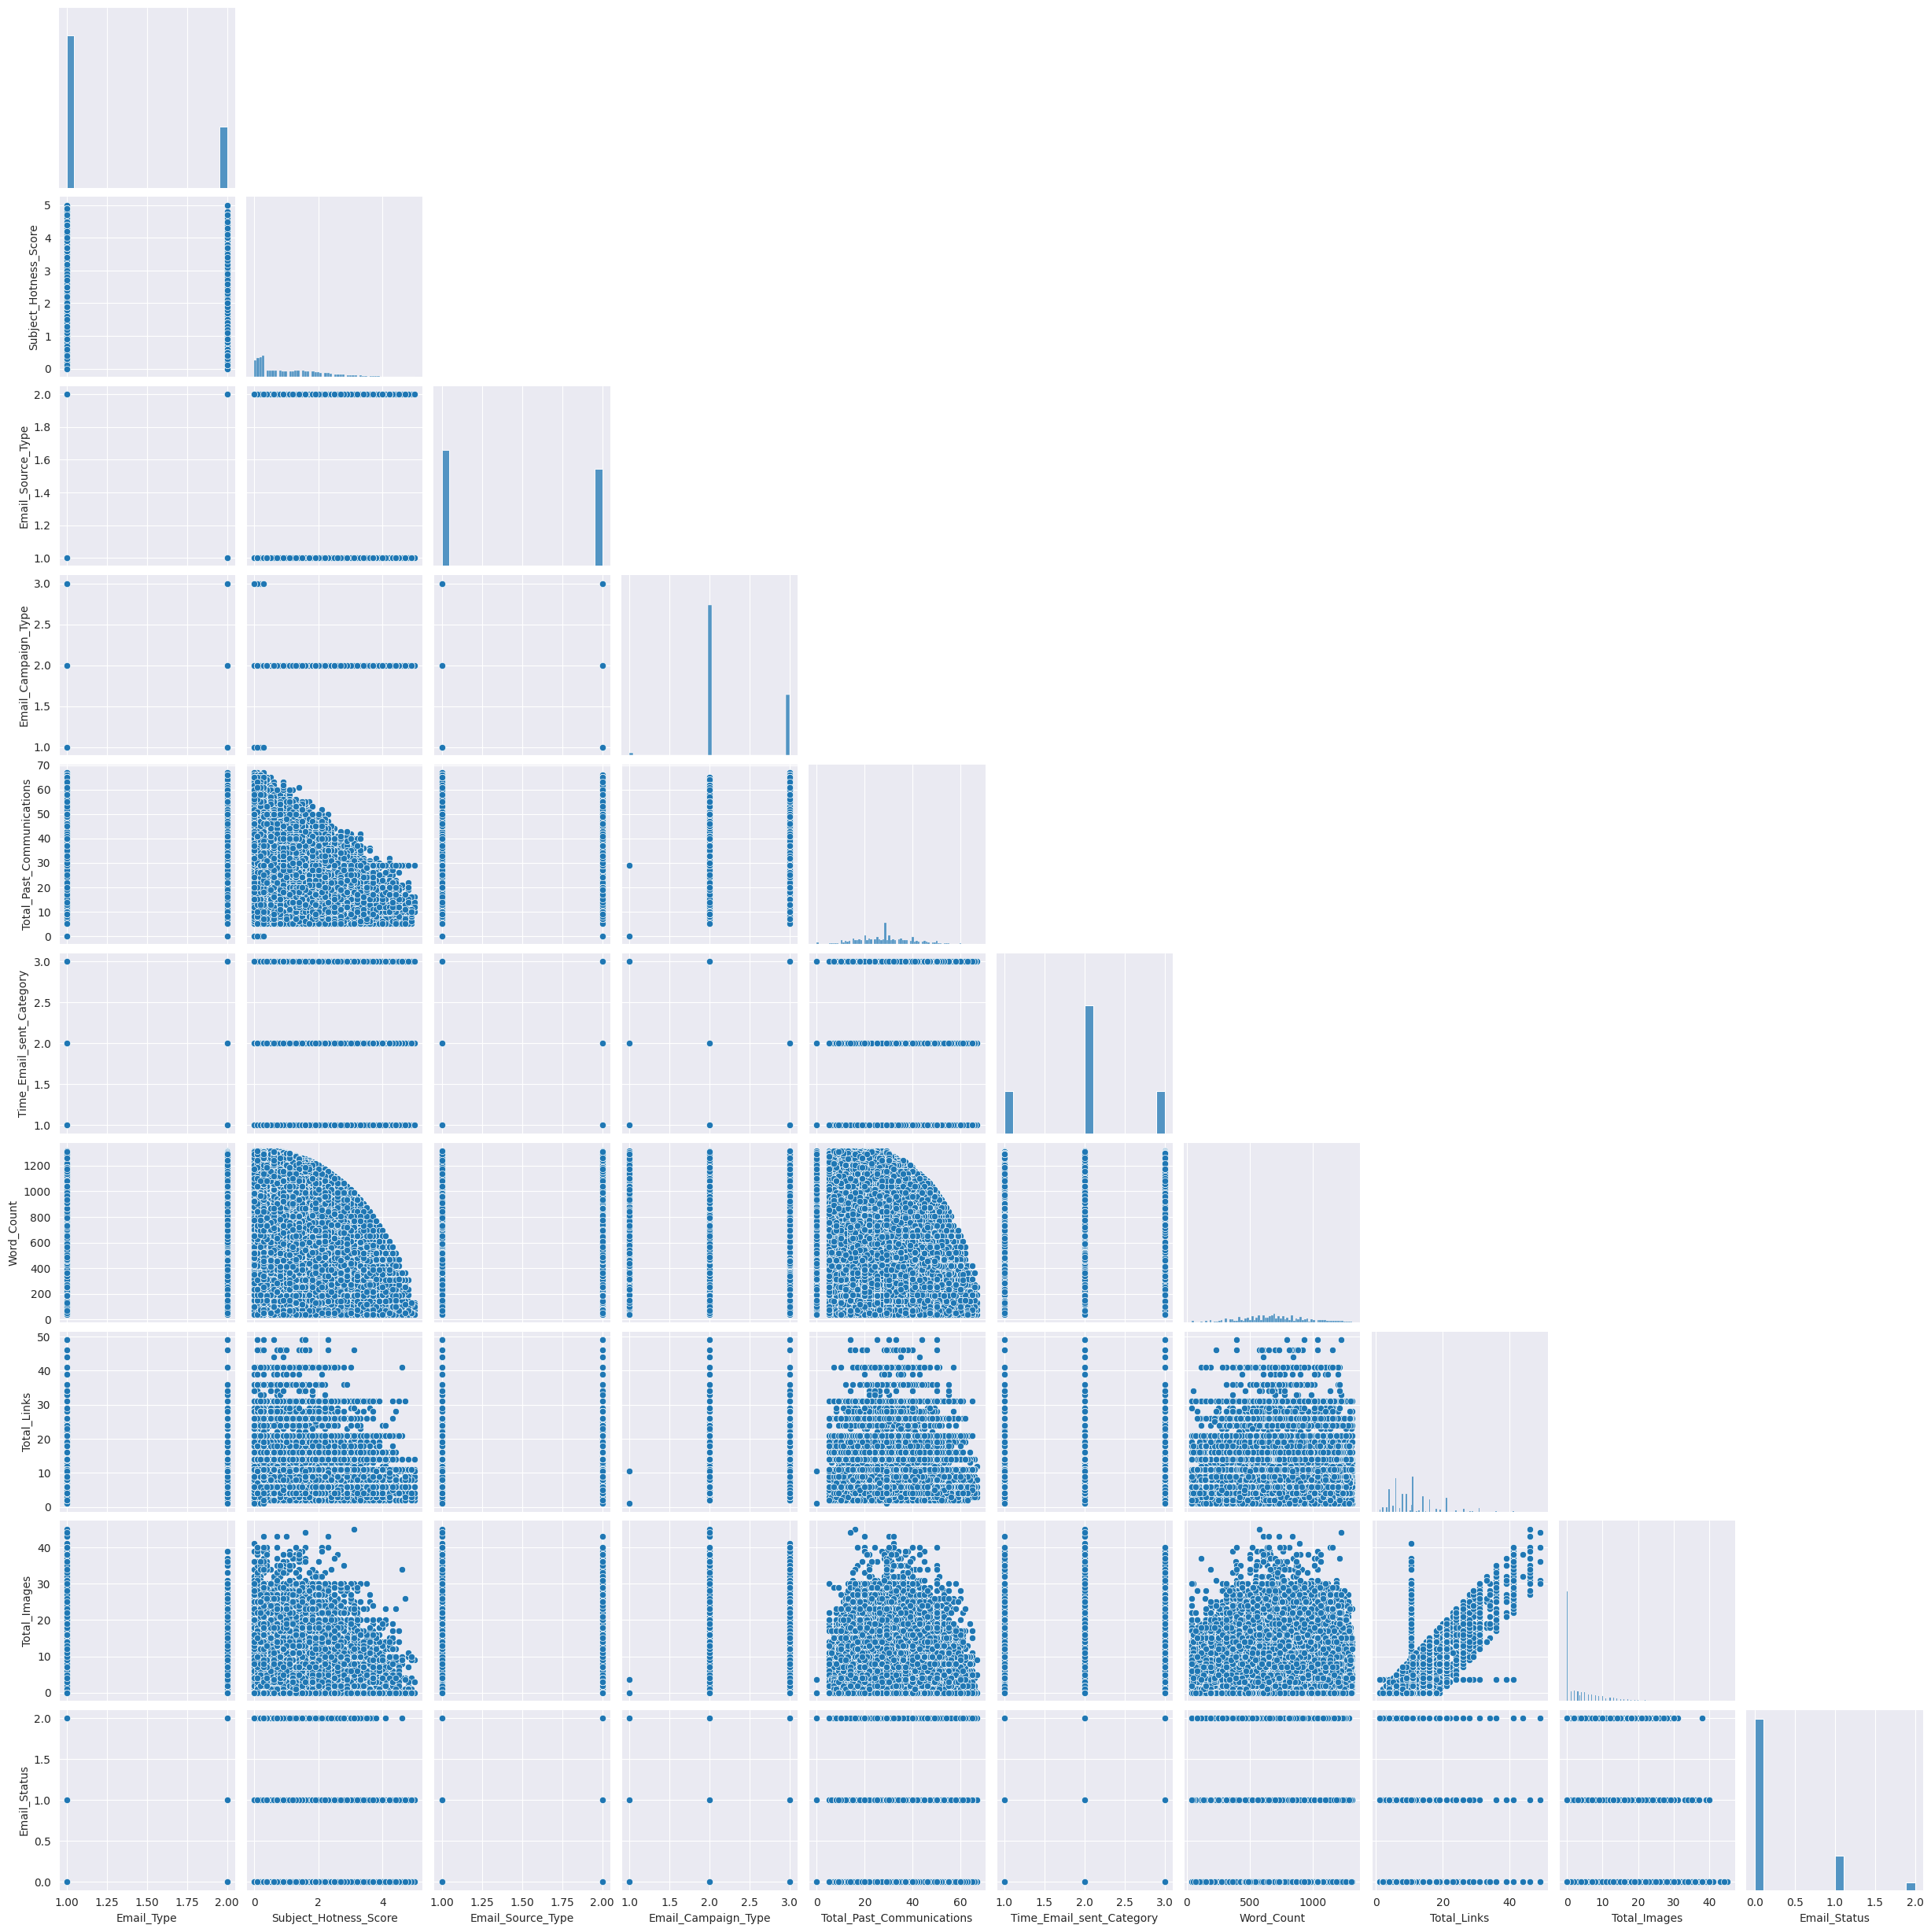

In [36]:
# Chart - 15 - Pair Plot
# Pair Plot visualization code
sns.pairplot(df, corner=True, palette='crest')


**Plot used:** pair plot shows the bivariate distribution of the data.

**Insights found:**

## **Hypothesis Testing**

####**Hypothetical Statement - 1**

**Linear relationship between Subject_Hotness_Score and Total_Past_Communications**

**H0**: There is no linear relationship between Subject_Hotness_Score and Total_Past_Communications (H0: ρ = 0)

**H1**: There is a linear relationship between Subject_Hotness_Score and Total_Past_Communications (H1: ρ ≠ 0)

**Test Type** : Pearson's correlation test

**Significance Value** = 0.05


In [37]:
data = df.copy()


In [38]:
#treating null values in Total_Past_Communications
data = data.fillna(data.mean())
r, p_value = stats.pearsonr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])
print(f"P-value is {p_value}\n")
if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")


""" # perform non-parametric Spearman's rank correlation test
rho, p_value1 = stats.spearmanr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])
print(f"P-value1 is {p_value1}\n")"""

P-value is 0.0

Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


' # perform non-parametric Spearman\'s rank correlation test\nrho, p_value1 = stats.spearmanr(data[\'Subject_Hotness_Score\'], data[\'Total_Past_Communications\'])\nprint(f"P-value1 is {p_value1}\n")'

**Why the specific statistical test?**: To check the corelation between two features - 'Subject_Hotness_Score' and 'Total_Past_Communications'.

**Observation**: The p-value obtain is highly significant, less than 0.05. hence, we reject the null hypothesis and conclude that the subject_Hotness_Score' and 'Total_Past_Communications are highly corelated.

####**Hypothetical Statement - 2**

**The Email_Type of the campaign will not have any significant impact on the Email_Status**

**H0**: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)


**H1**: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)

**Test Type** : chi-square test

**Significance Value** = 0.05

In [39]:
# Perform Statistical Test to obtain P-Value

# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['Email_Type'], df['Email_Status']))
print(f"the p-value is {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")


the p-value is 1.2336491824483095e-12
Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


Here, as the data is categoical, **Chi Square test** is used for getting p-value.

Chi Square-test best suits for comparing 2 categorical variables to understand the corelation between the features. Here, there is a relationship between Email_Status and Email_Type features.


**Hypothetical Statement - 3**

**The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email:**

**H0**: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)

**H1**: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)

**Test Type** : ANOVA Test

**Significance Value** = 0.05

**Statistical test performance**

In [40]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Links'],
                                  df[df['Customer_Location'] == 'B']['Total_Links'],
                                  df[df['Customer_Location'] == 'C']['Total_Links'],
                                  df[df['Customer_Location'] == 'D']['Total_Links'],
                                  df[df['Customer_Location'] == 'E']['Total_Links'],
                                  df[df['Customer_Location'] == 'F']['Total_Links'],
                                  df[df['Customer_Location'] == 'G']['Total_Links'])
print(f"the p-value is {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


the p-value is 0.40007495956868044
Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


**Test used:** For this hypothesis, I used ANOVA (Analysis of Variance) test because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

**Insights found:** This test is used to determine if there are significant differences between the means of two or more groups. In this case, we have different locations (A,B,C,D,E,F,G) and we want to determine if there is a significant difference in the mean of Total_Links among these groups. ANOVA is appropriate for this case because the variable Total_Links is continuous and we want to compare the means of multiple groups.

##**Feature Engineering & Data Pre-processing**

In [41]:
df.drop(['Email_ID'],axis=1,inplace=True)


In [42]:
df.drop('Customer_Location',inplace=True,axis=1)

As both the coluns Email_ID and Customer_Location are not usefull with respect to Email_Status column, hence, dropping both the columns.


**Handling missing values**

In [43]:
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)
df['Total_Images'].fillna(df['Total_Images'].median(), inplace = True)
df['Total_Links'].fillna(df['Total_Links'].median(), inplace = True)


1.   As the data of Total_Past_Communications feature is symmetricaly distributed, we can use mean value for imputing missing values for this feature.
2.   The features, Total_Links and Total_Images have outliers, imputing the missing values for these two continuous features having outliers with the median value as median is roboust with outliers.



**Handling Outliers**

In [44]:
# Handling Outliers & Outlier treatments

def check_outliers(df):
  outliers_percent=[]
  col_num = df.describe().columns
  outliers_count = []
  for i in col_num:
    Q1,Q3=df[i].quantile(0.25),df[i].quantile(0.75)
    IQR=Q3-Q1      # identify outliers
    lower,upper = Q1-1.5*IQR, Q3+1.5*IQR     #lower & upper percentile
    outliers = [x for x in df[i] if x < lower or x > upper]
    outliers_excluded_rows = [x for x in df[i] if x >= lower and x <= upper]
    outliers_percent.append((len(outliers)/(len(outliers)+len(outliers_excluded_rows)))*100)
    col = pd.Series(outliers_excluded_rows, name = i)  # getting features without outliers
    outliers_count.append(len(outliers))

  Outliers = pd.DataFrame({'Feature':list(col_num),'outliers_count': outliers_count, '% Of Outliers':outliers_percent})

  display(Outliers)

df1 = df.copy()
check_outliers(df1)

,Feature,outliers_count,% Of Outliers
0,Subject_Hotness_Score,247,0.361359
1,Total_Past_Communications,136,0.198967
2,Word_Count,0,0.000000
3,Total_Links,1608,2.352494
4,Total_Images,5585,8.170819


We can observe the percent of outliers for each numerical features. Total_Links and Total_Images has highest percent of outliers. Before we remove the outliers in these columns, lets check percentage for majority and minority class of Email_Status feature (Majority being Status = 0 and Minority being status 1 & 2 as per our visualisation chart-1).

outliers rows count 6096


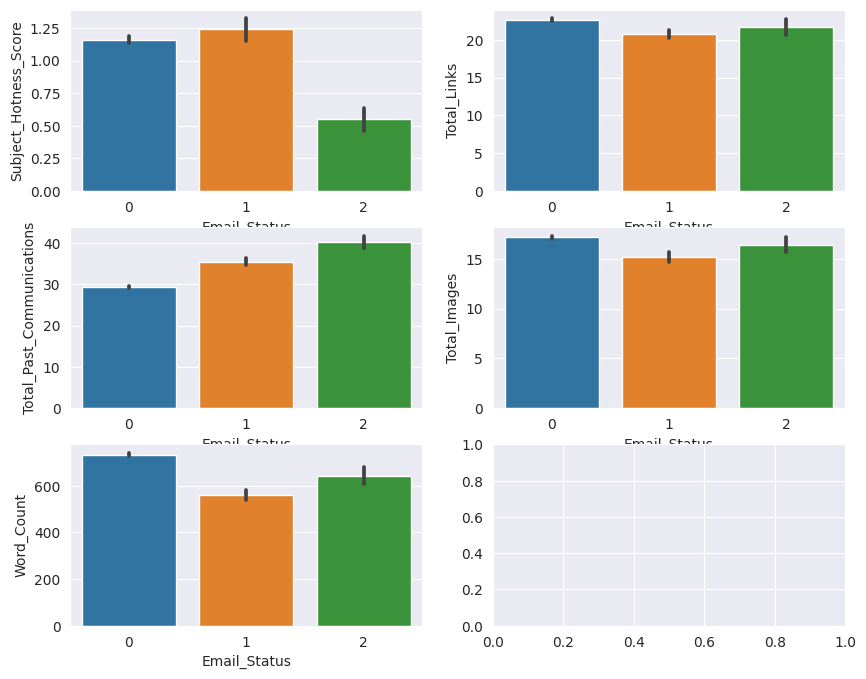

In [45]:
df2 = df.copy()
cols = df2.describe().columns
q1 = df2[cols].quantile(0.25)
q3 = df2[cols].quantile(0.75)
iqr = q3 - q1
min, max = (q1 - 1.5 * iqr), (q3 + 1.5 * iqr)
new_df2 = df2[((df2[cols] < min)|(df2[cols] > max)).any(axis=1)]

print(f"outliers rows count {new_df2.shape[0]}")


fig, axes = plt.subplots(3, 2, figsize=(10,8))
axe = axes.T.flatten()
cnt = 0
for i in new_df2.describe().columns:
  sns.barplot(data = new_df2, x=new_df2['Email_Status'], y=new_df2[i], ax=axe[cnt], orient='v')
  cnt+=1

plt.show()


In [46]:
outliers_percentage = ((len(new_df2.loc[new_df2['Email_Status']==0])/(len(df.loc[df['Email_Status']==0])))*100)
print(f"percent of outliers for majority class - email status 0: {outliers_percentage}")

percent of outliers for majority class - email status 0: 9.158915927995485


In [47]:
outliers_percentage_minor = ((len(new_df2.loc[new_df2['Email_Status']!=0])/(len(df.loc[df['Email_Status']!=0])))*100)
print(f"percent of outliers for minority class - email status 1&2: {outliers_percentage_minor}")

percent of outliers for minority class - email status 1&2: 7.933194154488518


**Method used:** The interquartile technique is used to detect the percentage of outliers in the dataset.

**Observation**: From above results we see that more than 5% of the data are outliers with respect to majority(Email_Status=0) and minority(Email_Status=1,2) Email_Status. **Hence, we will not remove any outliers for this dataset.**


**Categorical Encoding**

In [48]:
df.select_dtypes('object').columns


Index(['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type',
       'Time_Email_sent_Category', 'Email_Status'],
      dtype='object')

In [49]:
# Encode your categorical columns
df_encoded = df.copy()

# one hot encoding
df_encoded=pd.get_dummies(df, columns=[x for x in df.select_dtypes('object').columns if x !='Email_Status'], drop_first=True, sparse=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype           
---  ------                      --------------  -----           
 0   Subject_Hotness_Score       68353 non-null  float64         
 1   Total_Past_Communications   68353 non-null  float64         
 2   Word_Count                  68353 non-null  int64           
 3   Total_Links                 68353 non-null  float64         
 4   Total_Images                68353 non-null  float64         
 5   Email_Status                68353 non-null  object          
 6   Email_Type_2                68353 non-null  Sparse[uint8, 0]
 7   Email_Source_Type_2         68353 non-null  Sparse[uint8, 0]
 8   Email_Campaign_Type_2       68353 non-null  Sparse[uint8, 0]
 9   Email_Campaign_Type_3       68353 non-null  Sparse[uint8, 0]
 10  Time_Email_sent_Category_2  68353 non-null  Sparse[uint8, 0]
 11  Time_Email_sent_Category_3  

The **one hot encoding** is done  using get.dummies method for the categorical features. The categorical value has no precedence over other values, hence, we use One hot encoding here.


**Feature Manipulation**

In [50]:
# Manipulate Features to minimize feature correlation and create new features

#checking the multicolinearity between independent variables
def vif_calc(data):
# Select only numeric columns for VIF calculation
  numeric_columns = df_encoded[df_encoded.columns[1:]].select_dtypes(include=['int', 'float'])
# Calculate VIF for each feature
  vif_data = pd.DataFrame()
  vif_data["feature"] = numeric_columns.columns
  vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i)
                   for i in range(len(numeric_columns.columns))]
  vif_data['VIF'] = round(vif_data['VIF'], 2)
  print(vif_data)

vif_calc(df_encoded)

                     feature   VIF
0  Total_Past_Communications  3.93
1                 Word_Count  3.90
2                Total_Links  8.30
3               Total_Images  3.21


**Observation**: We can see that 'Total_Links' has high VIF indicating higher correlation. We can combine Total_Links and Total_Images columns to one column to reduce the multicolinearity between the features.

In [51]:
#Adding Total_Images and Total_Links features
df_encoded['Total_Links_Images'] = df_encoded['Total_Images'] + df_encoded['Total_Links']

# Dropping both the columns
df_encoded.drop(columns= ['Total_Images', 'Total_Links'], inplace=True)

#checking the vif after changes in features
vif_calc(df_encoded)


                     feature   VIF
0  Total_Past_Communications  3.42
1                 Word_Count  3.41
2         Total_Links_Images  2.59


**Data Transformation**

Not required.